**Import Modules and Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Read the Data

In [ ]:
imdb=pd.read_csv('/content/imdb_top_1000.csv')

In [ ]:
imdb.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
imdb[imdb.duplicated()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


Drop the Duplicated Values

In [ ]:
imdb.drop(['Poster_Link','Overview'],axis=1,inplace=True)

In [ ]:
imdb.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [ ]:
imdb.isnull()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,True,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
imdb.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
imdb.isnull().sum().sum()

427

Fill the null values

In [ ]:
imdb['Certificate'].fillna('U',inplace=True)
imdb['Meta_score'].fillna(imdb['Meta_score'].mean(),inplace=True)

In [ ]:
imdb["Gross"] = imdb["Gross"].str.replace(",", "")
imdb["Gross"] = imdb["Gross"].replace(np.nan, 0)
imdb["Gross"] = imdb["Gross"].astype(int)

In [ ]:
imdb["Gross"] = imdb["Gross"].replace(0,imdb['Gross'].mean())

In [ ]:
imdb.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [ ]:
imdb.nunique()

Series_Title     999
Released_Year    100
Certificate       16
Runtime          140
Genre            202
IMDB_Rating       17
Meta_score        64
Director         548
Star1            660
Star2            841
Star3            891
Star4            939
No_of_Votes      999
Gross            824
dtype: int64

In [ ]:
imdb.nunique().sum()

7240

In [ ]:
imdb.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.00000,1.000000e+03,1.000000e+03
mean,7.949300,77.97153,2.736929e+05,6.609161e+07
std,0.275491,11.36206,3.273727e+05,1.001299e+08
min,7.600000,28.00000,2.508800e+04,1.305000e+03
25%,7.700000,72.00000,5.552625e+04,5.012919e+06
50%,7.900000,77.97153,1.385485e+05,4.238945e+07
75%,8.100000,85.25000,3.741612e+05,6.153989e+07
max,9.300000,100.00000,2.343110e+06,9.366622e+08


In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          1000 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 109.5+ KB


In [ ]:
imdb.corr()

<ipython-input-20-aa5abc8f1fd5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  imdb.corr()


,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.253903,0.494979,0.088977
Meta_score,0.253903,1.000000,-0.017739,-0.034757
No_of_Votes,0.494979,-0.017739,1.000000,0.561197
Gross,0.088977,-0.034757,0.561197,1.000000


Separate Numerical and Categorical Features

In [ ]:
numerical_features=[i for i in imdb.columns if imdb[i].dtype!='O']
categorical_features=[i for i in imdb.columns if imdb[i].dtype=='O']

In [ ]:
numerical_features

['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

In [ ]:
categorical_features

['Series_Title',
 'Released_Year',
 'Certificate',
 'Runtime',
 'Genre',
 'Director',
 'Star1',
 'Star2',
 'Star3',
 'Star4']

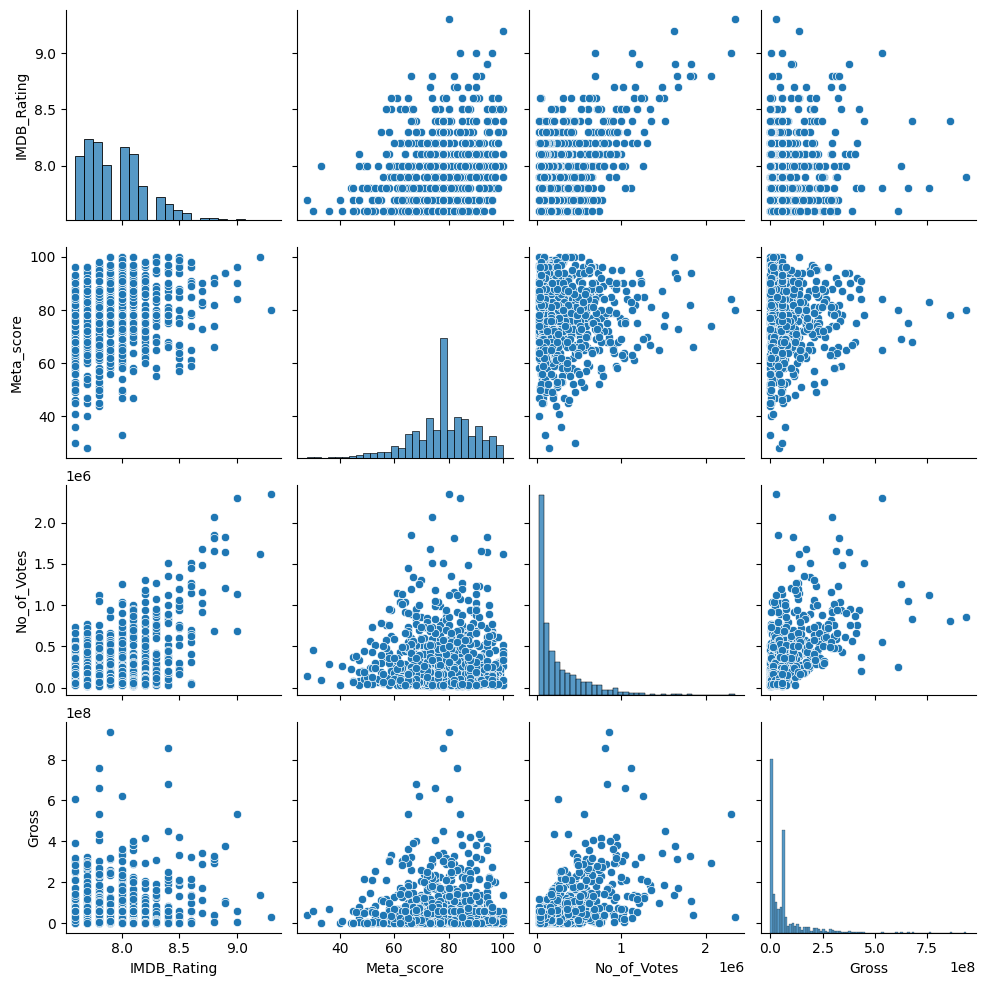

In [ ]:
sns.pairplot(imdb)

In [ ]:
imdb['IMDB_Rating'].value_counts()

7.7    157
7.8    151
8.0    141
8.1    127
7.6    123
7.9    106
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
8.9      3
9.0      3
9.2      1
9.3      1
Name: IMDB_Rating, dtype: int64

In [ ]:
imdb['Meta_score'].value_counts()

77.97153    157
76.00000     32
84.00000     29
90.00000     29
80.00000     27
           ... 
28.00000      1
36.00000      1
46.00000      1
30.00000      1
41.00000      1
Name: Meta_score, Length: 64, dtype: int64

In [ ]:
imdb['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [ ]:
imdb['Genre'].value_counts()

Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: Genre, Length: 202, dtype: int64

In [ ]:
imdb['Certificate'].value_counts()

U           335
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [ ]:
imdb['Runtime'].value_counts()

100 min    23
130 min    23
129 min    22
101 min    22
113 min    22
           ..
185 min     1
205 min     1
212 min     1
238 min     1
78 min      1
Name: Runtime, Length: 140, dtype: int64

In [ ]:
imdb['Director'].value_counts()

Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Neill Blomkamp       1
Tomas Alfredson      1
Duncan Jones         1
Jacques Audiard      1
George Stevens       1
Name: Director, Length: 548, dtype: int64

Text(0.5, 1.0, 'Top 15 Directors')

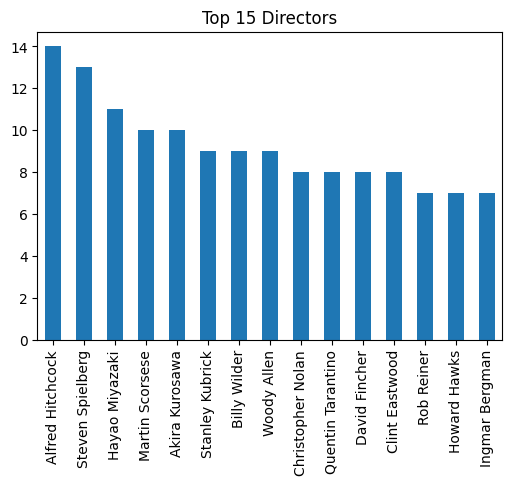

In [ ]:
imdb.Director.value_counts()[:15].plot.bar(figsize=(6,4))
plt.title('Top 15 Directors')

In [ ]:
imdb['Star1'].value_counts()

Tom Hanks          12
Robert De Niro     11
Al Pacino          10
Clint Eastwood     10
Humphrey Bogart     9
                   ..
Preity Zinta        1
Javier Bardem       1
Ki-duk Kim          1
Vladimir Garin      1
Robert Donat        1
Name: Star1, Length: 660, dtype: int64

Text(0.5, 1.0, 'Top 15 Star1 Actors')

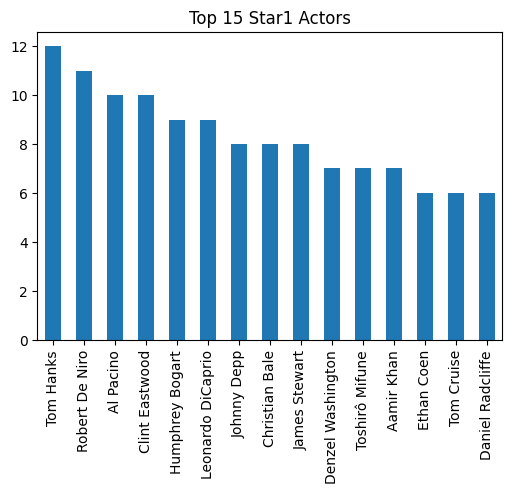

In [ ]:
imdb.Star1.value_counts()[:15].plot.bar(figsize=(6,4))
plt.title('Top 15 Star1 Actors')

In [ ]:
imdb['Star2'].value_counts()

Emma Watson          7
Matt Damon           5
Kate Winslet         4
Ian McKellen         4
Chris Evans          4
                    ..
Viola Davis          1
Morena Baccarin      1
Shahab Hosseini      1
Simon Yam            1
Madeleine Carroll    1
Name: Star2, Length: 841, dtype: int64

Text(0.5, 1.0, 'Top 15 Star2 Actors')

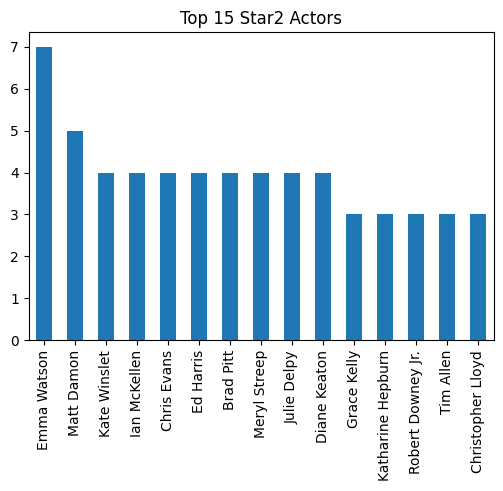

In [ ]:
imdb.Star2.value_counts()[:15].plot.bar(figsize=(6,4))
plt.title('Top 15 Star2 Actors')

In [ ]:
imdb['Star3'].value_counts()

Rupert Grint          5
Scarlett Johansson    4
Jennifer Connelly     4
Rachel McAdams        4
John Goodman          4
                     ..
Arifin Putra          1
Matthew Goode         1
Bradley Cooper        1
Gwilym Lee            1
Lucie Mannheim        1
Name: Star3, Length: 891, dtype: int64

Text(0.5, 1.0, 'Top 15 Star3 Actors')

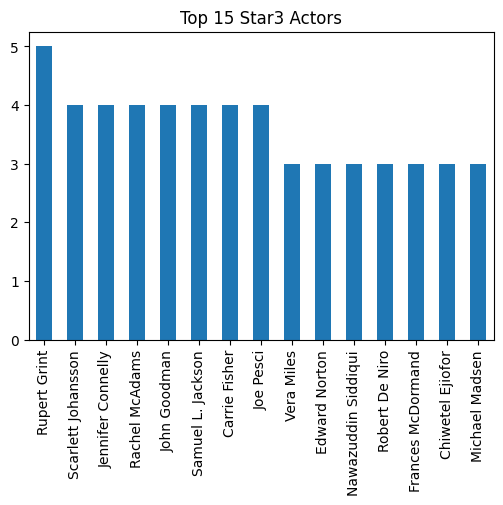

In [ ]:
imdb.Star3.value_counts()[:15].plot.bar(figsize=(6,4))
plt.title('Top 15 Star3 Actors')

In [ ]:
Sort_rating= imdb.sort_values(['IMDB_Rating'], ascending=False)
Sort_rating.head(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


Finding the number of movies with IMDB Rating greater than 9

In [ ]:
r=Sort_rating.query('(IMDB_Rating > 9)')
print('Number of movies with rating greater than 9 :',len(r))

Number of movies with rating greater than 9 : 2


In [ ]:
r['Series_Title']

0    The Shawshank Redemption
1               The Godfather
Name: Series_Title, dtype: object

In [ ]:
Sort_metascore= imdb.sort_values(['Meta_score'],ascending=False)
Sort_metascore.head(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
491,Boyhood,2014,A,165 min,Drama,7.9,100.0,Richard Linklater,Ellar Coltrane,Patricia Arquette,Ethan Hawke,Elijah Smith,335533,2.537998e+07
116,Lawrence of Arabia,1962,U,228 min,"Adventure, Biography, Drama",8.3,100.0,David Lean,Peter O'Toole,Alec Guinness,Anthony Quinn,Jack Hawkins,268085,4.482414e+07
81,Rear Window,1954,U,112 min,"Mystery, Thriller",8.4,100.0,Alfred Hitchcock,James Stewart,Grace Kelly,Wendell Corey,Thelma Ritter,444074,3.676431e+07
274,Fanny och Alexander,1982,A,188 min,Drama,8.1,100.0,Ingmar Bergman,Bertil Guve,Pernilla Allwin,Kristina Adolphson,Börje Ahlstedt,57784,4.971340e+06
440,Sweet Smell of Success,1957,Approved,96 min,"Drama, Film-Noir",8.0,100.0,Alexander Mackendrick,Burt Lancaster,Tony Curtis,Susan Harrison,Martin Milner,28137,5.653688e+07


Finding the number of movies with Meta_score greater than 99

In [ ]:
m=Sort_metascore.query('(Meta_score > 99)')
print('Number of movies with metascore 100 :',len(m))

Number of movies with metascore 100 : 12


In [ ]:
m['Series_Title']

491                   Boyhood
116        Lawrence of Arabia
81                Rear Window
274       Fanny och Alexander
440    Sweet Smell of Success
423            Il conformista
260     Trois couleurs: Rouge
1               The Godfather
559                 Notorious
50                 Casablanca
119                   Vertigo
124              Citizen Kane
Name: Series_Title, dtype: object

In [ ]:
votes=imdb.sort_values(['No_of_Votes'], ascending=False)
votes.head(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
8,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0
9,Fight Club,1999,A,139 min,Drama,8.8,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.0
6,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0


Finding the number of movies with more than 15 lakh votes votes

In [ ]:
v= votes.query('(No_of_Votes > 1500000)')
print('Number of movies with more than 1.5 million votes:',len(v))

Number of movies with more than 1.5 million votes: 12


In [ ]:
v['Series_Title'].head(12)

0                              The Shawshank Redemption
2                                       The Dark Knight
8                                             Inception
9                                            Fight Club
6                                          Pulp Fiction
11                                         Forrest Gump
14                                           The Matrix
10    The Lord of the Rings: The Fellowship of the Ring
5         The Lord of the Rings: The Return of the King
1                                         The Godfather
63                                The Dark Knight Rises
21                                         Interstellar
Name: Series_Title, dtype: object

In [ ]:
collection= imdb.sort_values(['Gross'],ascending=False)
collection.head(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,Star Wars: Episode VII - The Force Awakens,2015,U,138 min,"Action, Adventure, Sci-Fi",7.9,80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0
59,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.4,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0
623,Avatar,2009,UA,162 min,"Action, Adventure, Fantasy",7.8,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0
60,Avengers: Infinity War,2018,UA,149 min,"Action, Adventure, Sci-Fi",8.4,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0
652,Titanic,1997,UA,194 min,"Drama, Romance",7.8,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.0


Finding th number of movies with box office collection greater than 50 crores

In [ ]:
c= collection.query('(Gross > 500000000)')
print('Number of movies with more than 50 crores box office collection:',len(c))

Number of movies with more than 50 crores box office collection: 9


In [ ]:
c['Series_Title']

477    Star Wars: Episode VII - The Force Awakens
59                              Avengers: Endgame
623                                        Avatar
60                         Avengers: Infinity War
652                                       Titanic
357                                  The Avengers
891                                 Incredibles 2
2                                 The Dark Knight
582                                     Rogue One
Name: Series_Title, dtype: object

Import Libraries

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import coo_matrix

In [ ]:
content_features = ['Series_Title', 'Genre', 'Director', 'Star1', 'Star2', 'Star3']

collab_features = ['IMDB_Rating', 'Meta_score', 'Gross']

Content based Filtering

In [ ]:
content_df = imdb[content_features]
content_df['combined_features'] = content_df[content_features].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(content_df['combined_features'])
content_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

<ipython-input-88-88f3b5b6e541>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df['combined_features'] = content_df[content_features].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)


Collaborative filtering

In [ ]:
collab_df = imdb[collab_features]
collab_sparse = coo_matrix(collab_df.values)
collab_similarities = cosine_similarity(collab_sparse)

Function for Movie Recommendation

In [ ]:
def get_movie_recommendations(movie_title, top_n=5):
    movie_index = imdb[imdb['Series_Title'] == movie_title].index[0]

    # content-based similarity scores
    content_similarity_scores = content_similarities[movie_index]

    # collaborative filtering similarity scores
    collab_similarity_scores = collab_similarities[movie_index]

    # Combine the similarity scores using a weighted average
    combined_scores = 0.5 * content_similarity_scores + 0.5 * collab_similarity_scores

    # Get the top similar movies
    top_indices = combined_scores.argsort()[::-1][1:top_n+1]

    # Return recommended movie titles
    recommended_movies = imdb.iloc[top_indices]['Series_Title'].values
    return recommended_movies

In [ ]:
movie_title = 'The Avengers'
recommendations = get_movie_recommendations(movie_title)
print(f"Recommended movies for '{movie_title}':")
for movie in recommendations:
    print(movie)

Recommended movies for 'The Avengers':
Avengers: Endgame
Avengers: Infinity War
Captain America: Civil War
Serenity
Iron Man
